1. ***Main Change*** : <font color=#FF6600>Add synonyms with other two state to compare after all this process finish</font>
2. ***Step 1.2 **Keep all Food Nutrition data (not geographically specific)***** -> don't need a copy
3. ***Step 3.1 Check for zeros in key columns*** -> Provide a link or screenshot to explain
4. ***Step 3.1 (county_demographics_subset == -1).sum()*** -> why use dataset == -1 make sense -> filter(), groupby() - > to filter out the -1 value
5. ***Step 3.3*** -> know ***grain of the table***->single row represents : grain(weed) -> bottom single row as single counting -> count of tract : in group
6. ***Step 4.1*** -> using assign() -> doc.assign()
7. ***Step 4.2*** -> Explain why use mean()
8. ***Step 5.2*** -> Use df_
9. ***Step 8*** -> ask how to change color

# Step 1 : Data Loading

We now have:
* FoodAccessResearchAltas.csv
* county_demographics.csv
* food.csv

## Step 1.1

In [1]:
import pandas as pd

usda_atlas = pd.read_csv('FoodAccessResearchAltas.csv')
county_demographics = pd.read_csv('county_demographics.csv')
food_nutrition = pd.read_csv('food.csv')

In [2]:
print("USDA Atlas shape:", usda_atlas.shape)
print("USDA Atlas columns:", usda_atlas.columns.tolist())

USDA Atlas shape: (72531, 147)
USDA Atlas columns: ['CensusTract', 'State', 'County', 'Urban', 'Pop2010', 'OHU2010', 'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10', 'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome', 'LA1and10', 'LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20', 'LATractsVehicle_20', 'LAPOP1_10', 'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare', 'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare', 'lawhitehalf', 'lawhitehalfshare', 'lablackhalf', 'lablackhalfshare', 'laasianhalf', 'laasianhalfshare', 'lanhopihalf', 'lanhopihalfshare', 'laaianhalf', 'laaianhalfshare', 'laomultirhalf', 'laomultirhalfshare', 'lahisphalf', 'lahisphalfshare', 'lahunvhalf', 'lahunvhalfshare', 'lasnaphalf', 'lasnaphalfshare', 'lapop1', 'lapop1share', 'lalowi1

In [3]:
print("County Demographics shape:", county_demographics.shape)
print("County Demographics columns:", county_demographics.columns.tolist())

County Demographics shape: (3139, 43)
County Demographics columns: ['County', 'State', 'Age.Percent 65 and Older', 'Age.Percent Under 18 Years', 'Age.Percent Under 5 Years', "Education.Bachelor's Degree or Higher", 'Education.High School or Higher', 'Employment.Nonemployer Establishments', 'Ethnicities.American Indian and Alaska Native Alone', 'Ethnicities.Asian Alone', 'Ethnicities.Black Alone', 'Ethnicities.Hispanic or Latino', 'Ethnicities.Native Hawaiian and Other Pacific Islander Alone', 'Ethnicities.Two or More Races', 'Ethnicities.White Alone', 'Ethnicities.White Alone\t not Hispanic or Latino', 'Housing.Homeownership Rate', 'Housing.Households', 'Housing.Housing Units', 'Housing.Median Value of Owner-Occupied Units', 'Housing.Persons per Household', 'Income.Median Houseold Income', 'Income.Per Capita Income', 'Miscellaneous.Foreign Born', 'Miscellaneous.Land Area', 'Miscellaneous.Language Other than English at Home', 'Miscellaneous.Living in Same House +1 Years', 'Miscellaneous

In [4]:
print("Food Nutrition shape:", food_nutrition.shape)
print("Food Nutrition columns:", food_nutrition.columns.tolist())

Food Nutrition shape: (7083, 38)
Food Nutrition columns: ['Category', 'Description', 'Nutrient Data Bank Number', 'Data.Alpha Carotene', 'Data.Beta Carotene', 'Data.Beta Cryptoxanthin', 'Data.Carbohydrate', 'Data.Cholesterol', 'Data.Choline', 'Data.Fiber', 'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Niacin', 'Data.Protein', 'Data.Retinol', 'Data.Riboflavin', 'Data.Selenium', 'Data.Sugar Total', 'Data.Thiamin', 'Data.Water', 'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat', 'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid', 'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper', 'Data.Major Minerals.Iron', 'Data.Major Minerals.Magnesium', 'Data.Major Minerals.Phosphorus', 'Data.Major Minerals.Potassium', 'Data.Major Minerals.Sodium', 'Data.Major Minerals.Zinc', 'Data.Vitamins.Vitamin A - RAE', 'Data.Vitamins.Vitamin B12', 'Data.Vitamins.Vitamin B6', 'Data.Vitamins.Vitamin C', 'Data.Vitamins.Vitamin E', 'Data.Vitamins.Vitamin K']


In [5]:
usda_atlas.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [6]:
county_demographics.head()

,County,State,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,...,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,Abbeville County,SC,22.4,19.8,4.7,15.6,81.7,1416,0.3,0.4,...,51.8,12507,91371,1450,543,689,317,1080,187,1211
1,Acadia Parish,LA,15.8,25.8,6.9,13.3,79.0,4533,0.4,0.3,...,94.3,52706,602739,4664,1516,2629,705,3734,388,4007
2,Accomack County,VA,24.6,20.7,5.6,19.5,81.5,2387,0.7,0.8,...,73.8,53568,348195,2997,802,1716,335,2560,212,2536
3,Ada County,ID,14.9,23.2,5.6,38.5,95.2,41464,0.8,2.7,...,372.8,763099,5766679,41789,14661,19409,3099,36701,3803,35132
4,Adair County,IA,23.0,21.8,5.6,18.5,94.2,609,0.3,0.5,...,13.5,-1,63002,914,304,499,0,861,185,679


In [7]:
food_nutrition.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


## Step 1.2

Texas Filtering (Rows). Now let's filter for Texas data only. First, let me check what the State column looks like:

In [8]:
usda_atlas['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [9]:
county_demographics['State'].unique()

array(['SC', 'LA', 'VA', 'ID', 'IA', 'KY', 'MO', 'OK', 'CO', 'IL', 'IN',
       'MS', 'ND', 'NE', 'OH', 'PA', 'WA', 'WI', 'VT', 'MN', 'FL', 'NC',
       'CA', 'NY', 'WY', 'MI', 'AK', 'MD', 'KS', 'TN', 'TX', 'ME', 'AZ',
       'GA', 'AR', 'NJ', 'SD', 'AL', 'OR', 'WV', 'MA', 'UT', 'MT', 'NH',
       'NM', 'RI', 'NV', 'DC', 'CT', 'HI', 'DE'], dtype=object)

**Filter USDA Atlas for Texas**

In [10]:
usda_texas = usda_atlas.query("State == 'Texas'")
print("Texas tracts:", usda_texas.shape)
usda_texas.head()

Texas tracts: (5238, 147)


,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
61187,48001950100,Texas,Anderson County,0,4685,1874,0,49.0,1.05,0,...,912.0,4012.0,452.0,22.0,0.0,13.0,186.0,236.0,46.0,165.0
61188,48001950401,Texas,Anderson County,0,5422,77,1,5219.0,96.26,0,...,24.0,1825.0,2266.0,21.0,0.0,5.0,1305.0,1324.0,0.0,0.0
61189,48001950402,Texas,Anderson County,0,7535,83,1,7315.0,97.08,1,...,134.0,2591.0,3248.0,13.0,0.0,10.0,1673.0,1737.0,0.0,12.0
61190,48001950500,Texas,Anderson County,1,4377,1604,0,86.0,1.96,1,...,627.0,2737.0,800.0,19.0,2.0,20.0,799.0,1389.0,130.0,310.0
61191,48001950600,Texas,Anderson County,1,6405,2253,0,96.0,1.50,1,...,791.0,3831.0,1674.0,68.0,4.0,43.0,785.0,1253.0,230.0,289.0


**Filter County Demographics for Texas**

In [11]:
county_demographics_texas = county_demographics.query("State == 'TX'")
print("Texas counties:", county_demographics_texas.shape[0])
county_demographics_texas.head()

Texas counties: 254


,County,State,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,...,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
63,Anderson County,TX,15.0,19.0,5.1,10.6,81.3,3021,0.7,0.9,...,55.0,-1,572105,3107,1009,1602,722,2209,428,2471
65,Andrews County,TX,9.8,31.0,8.4,12.2,72.3,1449,1.5,0.7,...,9.9,21390,169819,1324,400,695,469,726,143,1075
67,Angelina County,TX,16.6,25.4,6.7,16.9,81.9,5782,0.8,1.1,...,108.8,141533,1274727,6330,1922,3487,1358,4707,709,5020
77,Aransas County,TX,28.9,17.7,4.7,21.9,84.5,2694,1.3,2.1,...,91.9,50540,288881,2712,859,1510,778,1835,341,2281
79,Archer County,TX,19.6,21.5,5.3,23.9,90.3,943,1.5,0.5,...,10.0,-1,25491,986,265,528,151,817,103,781


In [74]:
# county_demographics_texas.to_csv('County_Demographics_Texas.csv', index=False)

**Keep all Food Nutrition data (not geographically specific)**

In [12]:
# copy()
food_nutrition_clean = food_nutrition.copy()
print("Food items:", food_nutrition_clean.shape[0])

Food items: 7083


# Step 2
We now have:
* usda_texas - usda data in Texas
* county_demographics_texas - counties data in Texas
* food_nutrition_clean - original

## Select Essential Columns -> filter()

Now let's subset to only the essential columns needed for analysis.

### USDA Food Access Atlas (10 columns)

* **PovertyRate** : Percentage of tract population living at or below federal poverty threshold
* **lapop1** : Population count beyond 1 mile from supermarket
* **lalowi1** : Low income population count beyond 1 mile from supermarket
* **lablack1** : Black/African American population count with low access
* **lahisp1** : Hispanic/Latino population count with low access
* **TractLOWI** : Total count of low-income population in tract

In [13]:
#usda_cols = ['State', 'County', 'Urban', 'PovertyRate', 'Pop2010', 
#             'lapop1', 'lalowi1', 'lablack1', 'lahisp1', 'TractLOWI']
#usda_texas_subset = usda_texas[usda_cols]

usda_texas_subset = usda_texas.filter(items=['State', 'County', 'Urban', 'PovertyRate', 'Pop2010', 
                                             'lapop1', 'lalowi1', 'lablack1', 'lahisp1', 'TractLOWI'])
print("USDA subset shape:", usda_texas_subset.shape)

USDA subset shape: (5238, 10)


### County Demographics (10 columns)

* **Income.Median Houseold Income** :

This includes the income of the householder and all other individuals 15 years old and over in the household whether they are related to the householder or not. Because many households consist of only one person average household income is usually less than average family income.

* **Population.Population per Square Mile** :

Population density

In [14]:
#demo_cols = ['County', 'State', 'Population.2010 Population', 
#             'Income.Median Houseold Income', 
#             'Education.Bachelor\'s Degree or Higher',
#             'Age.Percent Under 18 Years', 'Ethnicities.Black Alone',
#             'Ethnicities.Hispanic or Latino', 'Ethnicities.White Alone',
#             'Population.Population per Square Mile']

#county_demographics_subset = county_demographics_texas[demo_cols]
county_demographics_subset = county_demographics_texas.filter(items=['County', 'State', 'Population.2010 Population', 
                                                                     'Income.Median Houseold Income', 
                                                                     'Education.Bachelor\'s Degree or Higher',
                                                                     'Age.Percent Under 18 Years', 'Ethnicities.Black Alone',
                                                                     'Ethnicities.Hispanic or Latino', 'Ethnicities.White Alone',
                                                                     'Population.Population per Square Mile'])
print("Demographics subset shape:", county_demographics_subset.shape)

Demographics subset shape: (254, 10)


### Food Nutrition (9 columns)

In [15]:
#food_cols = ['Category', 'Description', 'Data.Protein', 'Data.Carbohydrate',
#             'Data.Fiber', 'Data.Sugar Total', 'Data.Fat.Total Lipid',
#            'Data.Vitamins.Vitamin A - RAE', 'Data.Major Minerals.Calcium']

#food_nutrition_subset = food_nutrition_clean[food_cols]
food_nutrition_subset = food_nutrition_clean.filter(items=['Category', 'Description', 'Data.Protein', 'Data.Carbohydrate',
                                                           'Data.Fiber', 'Data.Sugar Total', 'Data.Fat.Total Lipid',
                                                           'Data.Vitamins.Vitamin A - RAE', 'Data.Major Minerals.Calcium'])
print("Food subset shape:", food_nutrition_subset.shape)

Food subset shape: (7083, 9)


# Step 3 : Data Cleaning

We now have: 
* usda_texas_subset - usda data filter 10 columns
* county_demographics_subset - counties data filter 10 columns
* food_nutrition_subset - food nutrition data filter 9 columns

clean version:
* usda_texas_subset
* county_demographics_subset
* food_nutrition_subset

## Step 3.1: Handle Missing Values

### usda_texas_subset

First, let's check for missing values in the USDA Atlas:
understand why drop this NULL and explain why need to drop

In [16]:
usda_texas_subset.isnull().sum()

State             0
County            0
Urban             0
PovertyRate       0
Pop2010           0
lapop1         1183
lalowi1        1183
lablack1       1183
lahisp1        1183
TractLOWI         0
dtype: int64

In [17]:
usda_texas_cleaned = usda_texas_subset.dropna()

In [18]:
usda_texas_cleaned.isnull().sum()

State          0
County         0
Urban          0
PovertyRate    0
Pop2010        0
lapop1         0
lalowi1        0
lablack1       0
lahisp1        0
TractLOWI      0
dtype: int64

In [19]:
usda_texas_cleaned.shape

(4055, 10)

In [20]:
print("Original rows:", usda_texas_subset.shape[0])
print("After removing NULLs:", usda_texas_cleaned.shape[0])
print("Rows removed:", usda_texas_subset.shape[0] - usda_texas_cleaned.shape[0])

Original rows: 5238
After removing NULLs: 4055
Rows removed: 1183


**Check for zeros in key columns (zeros are valid - they mean "no population beyond threshold"):**

provide link or screenshot

In [21]:
print("Zeros in Pop2010:", (usda_texas_subset['Pop2010'] == 0).sum())

Zeros in Pop2010: 0


In [22]:
print("Zeros in TractLOWI:", (usda_texas_subset['TractLOWI'] == 0).sum())

Zeros in TractLOWI: 25


### county_demographics_subset

County Demographics - Check for -1 and NULL, then Remove:

In [23]:
county_demographics_subset.isnull().sum()

County                                   0
State                                    0
Population.2010 Population               0
Income.Median Houseold Income            0
Education.Bachelor's Degree or Higher    0
Age.Percent Under 18 Years               0
Ethnicities.Black Alone                  0
Ethnicities.Hispanic or Latino           0
Ethnicities.White Alone                  0
Population.Population per Square Mile    0
dtype: int64

why use dataset == -1 make sense -> filter(), groupby() - > to filter out the -1 value

In [149]:
(county_demographics_subset == -1).sum()

County                                   0
State                                    0
Population.2010 Population               0
Income.Median Houseold Income            0
Education.Bachelor's Degree or Higher    0
Age.Percent Under 18 Years               0
Ethnicities.Black Alone                  1
Ethnicities.Hispanic or Latino           0
Ethnicities.White Alone                  0
Population.Population per Square Mile    0
dtype: int64

In [25]:
county_demographics_temp = county_demographics_subset.replace(-1, pd.NA)

In [26]:
county_demographics_cleaned = county_demographics_temp.dropna()
print("Original rows:", county_demographics_subset.shape[0])
print("After removing NULLs:", county_demographics_cleaned.shape[0])
print("Rows removed:", county_demographics_subset.shape[0] - county_demographics_cleaned.shape[0])

Original rows: 254
After removing NULLs: 253
Rows removed: 1


### food_nutrtion_subset

Food Nutrition - Check and Remove NULL values:

In [27]:
food_nutrition_subset.isnull().sum()

Category                         0
Description                      0
Data.Protein                     0
Data.Carbohydrate                0
Data.Fiber                       0
Data.Sugar Total                 0
Data.Fat.Total Lipid             0
Data.Vitamins.Vitamin A - RAE    0
Data.Major Minerals.Calcium      0
dtype: int64

Since there's no missing value or NULL, we can just move to next step

In [28]:
food_nutrition_cleaned = food_nutrition_subset.copy()

## Step 3.2: Standardize Column Names

Now we have three clean datasets with NO missing values:
* usda_texas_cleaned
* county_demographics_cleaned
* food_nutrition_cleaned

### County Demographics - Flatten dot notation -> county_demographics_renamed

In [29]:
county_columns_rename = {
    'Population.2010 Population': 'Population2010',
    'Income.Median Houseold Income': 'MedianIncome',
    'Education.Bachelor\'s Degree or Higher': 'Pct_BachelorsOrHigher',
    'Age.Percent Under 18 Years': 'Pct_Under18',
    'Ethnicities.Black Alone': 'Pct_Black',
    'Ethnicities.Hispanic or Latino': 'Pct_Hispanic',
    'Ethnicities.White Alone': 'Pct_White',
    'Population.Population per Square Mile': 'PopDensity'
}

county_demographics_renamed = county_demographics_cleaned.rename(columns=county_columns_rename)
county_demographics_renamed.columns.tolist()

['County',
 'State',
 'Population2010',
 'MedianIncome',
 'Pct_BachelorsOrHigher',
 'Pct_Under18',
 'Pct_Black',
 'Pct_Hispanic',
 'Pct_White',
 'PopDensity']

### Food Nutrition - Simplify nested names -> food_nutrtion_renamed

In [30]:
food_columns_rename = {
    'Data.Protein': 'Protein',
    'Data.Carbohydrate': 'Carbohydrate',
    'Data.Fiber': 'Fiber',
    'Data.Sugar Total': 'SugarTotal',
    'Data.Fat.Total Lipid': 'TotalFat',
    'Data.Vitamins.Vitamin A - RAE': 'VitaminA',
    'Data.Major Minerals.Calcium': 'Calcium'
}
food_nutrition_renamed = food_nutrition_cleaned.rename(columns=food_columns_rename)
food_nutrition_renamed.columns.tolist()

['Category',
 'Description',
 'Protein',
 'Carbohydrate',
 'Fiber',
 'SugarTotal',
 'TotalFat',
 'VitaminA',
 'Calcium']

In [31]:
food_nutrition_renamed.head()

,Category,Description,Protein,Carbohydrate,Fiber,SugarTotal,TotalFat,VitaminA,Calcium
0,Milk,"Milk, human",1.03,6.89,0.0,6.89,4.38,61,32
1,Milk,"Milk, NFS",3.34,4.87,0.0,4.89,1.99,59,126
2,Milk,"Milk, whole",3.28,4.67,0.0,4.81,3.20,32,123
3,Milk,"Milk, low sodium, whole",3.10,4.46,0.0,4.46,3.46,29,101
4,Milk,"Milk, calcium fortified, whole",3.28,4.67,0.0,4.81,3.20,32,123


## Step 3.3 : Standardize Geographic Names

Let's check the format of County names in both datasets

grain of the table -> single row represents -> grain(weed) -> bottom single row as single counting
count of tract : in group 

In [32]:
usda_texas_cleaned['County'].head(10)

61187    Anderson County
61188    Anderson County
61189    Anderson County
61190    Anderson County
61191    Anderson County
61192    Anderson County
61193    Anderson County
61194    Anderson County
61195    Anderson County
61196    Anderson County
Name: County, dtype: object

In [33]:
county_demographics_renamed['County'].head(10)

63      Anderson County
65       Andrews County
67      Angelina County
77       Aransas County
79        Archer County
85     Armstrong County
96      Atascosa County
109       Austin County
115       Bailey County
125      Bandera County
Name: County, dtype: object

**Check sample counties from both:**

In [34]:
print("USDA sample counties:", usda_texas_cleaned['County'].unique()[:5])

USDA sample counties: ['Anderson County' 'Andrews County' 'Angelina County' 'Aransas County'
 'Archer County']


In [35]:
print("Demographics sample counties:", county_demographics_renamed['County'].unique()[:5])

Demographics sample counties: ['Anderson County' 'Andrews County' 'Angelina County' 'Aransas County'
 'Archer County']


**Check State format**

In [36]:
print("USDA State format:", usda_texas_cleaned['State'].unique())

USDA State format: ['Texas']


In [37]:
print("Demographics State format:", county_demographics_renamed['State'].unique())

Demographics State format: ['TX']


**Standardize State to "TX" in USDA dataset**

In [38]:
usda_texas_standardized = usda_texas_cleaned.copy()
usda_texas_standardized['State'] = 'TX'
usda_texas_standardized['State'].unique()

array(['TX'], dtype=object)

**Verify both datasets now have matching State values:**

In [39]:
print("USDA State:", usda_texas_standardized['State'].unique())
print("Demographics State:", county_demographics_renamed['State'].unique())

USDA State: ['TX']
Demographics State: ['TX']


**Check number of unique counties**

In [40]:
print("Number of unique counties in USDA:", usda_texas_standardized['County'].nunique())

Number of unique counties in USDA: 254


In [41]:
print("Number of unique counties in Demographics:", county_demographics_renamed['County'].nunique())

Number of unique counties in Demographics: 253


Because we drop a NULL value in county_demographics dataset, so the counties would one less than USDA

# Step 4 : Data Transformation

We now have:
* usda_texas_standardized - cleaned USDA data with standardized State
* county_demographics_renamed - cleaned demographics with renamed columns
* food_nutrition_renamed - cleaned food data with renamed columns

## Step 4.1: Calculate Derived Metrics (USDA Atlas)

### Calculate PercentLowAccess (% of tract population >1 mile from supermarket)
What percentage of the tract's total population lives more than 1 mile from a supermarket?

using assign() -> doc.assign()

In [42]:
usda_with_metrics = usda_texas_standardized.copy()

usda_with_metrics['PercentLowAccess'] = (usda_with_metrics['lapop1'] / usda_with_metrics['Pop2010']) * 100

usda_with_metrics['PercentLowAccess'].describe()

count    4055.000000
mean       50.525727
std        36.757270
min         0.000000
25%        14.606815
50%        47.082729
75%        90.102069
max       100.000000
Name: PercentLowAccess, dtype: float64

Example:

* Census Tract A has POP2010 = 5,000 people total
* lapop1 = 1,500 people live >1 mile from supermarket
* PercentLowAccess = (1,500 / 5,000) × 100 = 30%
* Interpretation: 30% of this tract's population has low access to food

### PercentLowIncomeLowAccess (% of low-income population with low access:
What it means: Among the low-income population in this tract, what percentage also has low food access?



First, check for zero values in TractLOWI (to avoid division by zero):

In [43]:
print("Zeros in TractLOWI:", (usda_with_metrics['TractLOWI'] == 0).sum())

Zeros in TractLOWI: 25


**Calculate the percentage, handling division by zero:**

In [44]:
usda_with_metrics['PercentLowIncomeLowAccess'] = (usda_with_metrics['lalowi1'] / usda_with_metrics['TractLOWI']) * 100

usda_with_metrics['PercentLowIncomeLowAccess'].describe()

count     4030.000000
mean        58.407285
std        318.847105
min          0.000000
25%         12.215766
50%         41.129700
75%         79.227166
max      15955.000000
Name: PercentLowIncomeLowAccess, dtype: float64

In [45]:
usda_with_metrics.isnull().sum()

State                         0
County                        0
Urban                         0
PovertyRate                   0
Pop2010                       0
lapop1                        0
lalowi1                       0
lablack1                      0
lahisp1                       0
TractLOWI                     0
PercentLowAccess              0
PercentLowIncomeLowAccess    25
dtype: int64

In [46]:
usda_with_metrics = usda_with_metrics.dropna()

Example:
* Census Tract B has TractLOWI = 2,000 low-income people
* lalowi1 = 800 low-income people with low access
* PercentLowIncomeLowAccess = (800 / 2,000) × 100 = 40%
* Interpretation: 40% of low-income residents have low food access

**Why These Calculations Matter**
Without percentages (raw counts only):

* Tract 1: 1,000 people with low access (sounds bad)
* Tract 2: 500 people with low access (sounds better)

**BUT if we look at percentages**

* Tract 1: 1,000 out of 10,000 = 10% low access (not too bad)
* Tract 2: 500 out of 1,000 = 50% low access (much worse!)

Percentages allow fair comparisons between large urban tracts and small rural tracts.

### Verify New Columns

In [47]:
usda_with_metrics.columns.tolist()

['State',
 'County',
 'Urban',
 'PovertyRate',
 'Pop2010',
 'lapop1',
 'lalowi1',
 'lablack1',
 'lahisp1',
 'TractLOWI',
 'PercentLowAccess',
 'PercentLowIncomeLowAccess']

## Step 4.2 : Categorize Nutrition (Food Nutrition)

### Group by Category and Calculate Mean Nutritional Values

In [48]:
food_nutrition_grouped = (
    food_nutrition_renamed
    .groupby('Category', as_index=False)
    .agg({
        'Protein': 'mean',
        'Carbohydrate': 'mean',
        'Fiber': 'mean',
        'SugarTotal': 'mean',
        'TotalFat': 'mean',
        'VitaminA': 'mean',
        'Calcium': 'mean'
    })
)

print(f"Shape: {food_nutrition_grouped.shape}")
food_nutrition_grouped = food_nutrition_grouped.round(1)
food_nutrition_grouped

Shape: (2429, 8)


,Category,Protein,Carbohydrate,Fiber,SugarTotal,TotalFat,VitaminA,Calcium
0,100 GRAND Bar,2.5,71.0,1.0,51.9,19.3,38.0,76.0
1,3 MUSKETEERS Bar,2.6,77.8,1.5,66.9,12.8,20.0,54.0
2,3 Musketeers Truffle Crisp Bar,6.4,63.2,0.0,57.7,28.8,46.0,150.0
3,Abalone,24.2,11.6,0.2,0.3,5.8,7.7,52.7
4,Adobo,17.3,8.5,0.3,0.0,7.8,4.0,16.5
...,...,...,...,...,...,...,...,...
2424,Zombie,0.2,9.2,0.1,7.2,0.0,4.0,9.0
2425,Zucchini,1.0,7.4,0.8,6.9,0.3,8.0,15.0
2426,Zucchini lasagna,5.4,13.1,1.6,3.2,3.3,88.0,114.0
2427,Zucchini soup,1.7,2.7,0.4,2.5,0.8,23.0,44.0


### Wider/Longer

In [49]:
food_nutrition_long = (
    food_nutrition_grouped.melt(
        id_vars=['Category'], 
        var_name='Nutrient', 
        value_name='MeanValue'
    )
)

print(f"Shape: {food_nutrition_long.shape}")
food_nutrition_long.head(10)

Shape: (17003, 3)


,Category,Nutrient,MeanValue
0,100 GRAND Bar,Protein,2.5
1,3 MUSKETEERS Bar,Protein,2.6
2,3 Musketeers Truffle Crisp Bar,Protein,6.4
3,Abalone,Protein,24.2
4,Adobo,Protein,17.3
5,Agave liquid sweetener,Protein,0.1
6,Air filled fritter or fried puff,Protein,6.5
7,Alcoholic malt beverage,Protein,0.3
8,Alexander,Protein,1.0
9,Alfalfa sprouts,Protein,4.0


In [50]:
# Then, use pivot() to create wide format with Nutrients as columns
food_nutrition_pivoted = (
    food_nutrition_long.pivot(
        index='Category', 
        columns='Nutrient', 
        values='MeanValue'
    )
    .reset_index()
)

print(f"Shape: {food_nutrition_pivoted.shape}")
food_nutrition_pivoted.head()

Shape: (2429, 8)


Nutrient,Category,Calcium,Carbohydrate,Fiber,Protein,SugarTotal,TotalFat,VitaminA
0,100 GRAND Bar,76.0,71.0,1.0,2.5,51.9,19.3,38.0
1,3 MUSKETEERS Bar,54.0,77.8,1.5,2.6,66.9,12.8,20.0
2,3 Musketeers Truffle Crisp Bar,150.0,63.2,0.0,6.4,57.7,28.8,46.0
3,Abalone,52.7,11.6,0.2,24.2,0.3,5.8,7.7
4,Adobo,16.5,8.5,0.3,17.3,0.0,7.8,4.0


### Categorize Nutritional Values

[FDA Daily Value](https://www.fda.gov/food/nutrition-facts-label/daily-value-nutrition-and-supplement-facts-labels)

In [51]:
# Import numpy for np.select
import numpy as np

#### SugarTotal

High sugar intake is linked to health issues; categorizing helps identify high-sugar vs low-sugar foods.


Thresholds:

* High: > 15 grams (>25% of 50g daily max)
* Medium: 5-15 grams
* Low: < 5 grams

In [52]:
# Categorize SugarTotal
food_nutrition_pivoted = (
    food_nutrition_pivoted.assign(
        Sugar_Level = lambda df_: np.select(
            condlist=[
                df_['SugarTotal'] > 15,
                df_['SugarTotal'].between(5, 15, inclusive='both'),
                df_['SugarTotal'] < 5
            ],
            choicelist=['High', 'Medium', 'Low'],
            default='Unknown'
        )
    )
)

food_nutrition_pivoted.head()

Nutrient,Category,Calcium,Carbohydrate,Fiber,Protein,SugarTotal,TotalFat,VitaminA,Sugar_Level
0,100 GRAND Bar,76.0,71.0,1.0,2.5,51.9,19.3,38.0,High
1,3 MUSKETEERS Bar,54.0,77.8,1.5,2.6,66.9,12.8,20.0,High
2,3 Musketeers Truffle Crisp Bar,150.0,63.2,0.0,6.4,57.7,28.8,46.0,High
3,Abalone,52.7,11.6,0.2,24.2,0.3,5.8,7.7,Low
4,Adobo,16.5,8.5,0.3,17.3,0.0,7.8,4.0,Low


#### TotalFat
Important for understanding nutritional quality and health implications.



Thresholds (per 100g serving):

* High: > 20 grams
* Medium: 5-20 grams
* Low: < 5 grams

In [53]:
# Categorize TotalFat
food_nutrition_pivoted = (
    food_nutrition_pivoted.assign(
        Fat_Level = lambda df_: np.select(
            condlist=[
                df_['TotalFat'] > 20,
                df_['TotalFat'].between(5, 20, inclusive='both'),
                df_['TotalFat'] < 5
            ],
            choicelist=['High', 'Medium', 'Low'],
            default='Unknown'
        )
    )
)

food_nutrition_pivoted.head()

Nutrient,Category,Calcium,Carbohydrate,Fiber,Protein,SugarTotal,TotalFat,VitaminA,Sugar_Level,Fat_Level
0,100 GRAND Bar,76.0,71.0,1.0,2.5,51.9,19.3,38.0,High,Medium
1,3 MUSKETEERS Bar,54.0,77.8,1.5,2.6,66.9,12.8,20.0,High,Medium
2,3 Musketeers Truffle Crisp Bar,150.0,63.2,0.0,6.4,57.7,28.8,46.0,High,High
3,Abalone,52.7,11.6,0.2,24.2,0.3,5.8,7.7,Low,Medium
4,Adobo,16.5,8.5,0.3,17.3,0.0,7.8,4.0,Low,Medium


#### Protein

Helps identify protein-rich foods vs lower-protein options.



Thresholds (per 100g serving):

* High: > 15 grams (excellent protein source)
* Medium: 5-15 grams
* Low: < 5 grams

In [54]:
# Categorize Protein
food_nutrition_pivoted = (
    food_nutrition_pivoted.assign(
        Protein_Level = lambda df_: np.select(
            condlist=[
                df_['Protein'] > 15,
                df_['Protein'].between(5, 15, inclusive='both'),
                df_['Protein'] < 5
            ],
            choicelist=['High', 'Medium', 'Low'],
            default='Unknown'
        )
    )
)

food_nutrition_pivoted.head()

Nutrient,Category,Calcium,Carbohydrate,Fiber,Protein,SugarTotal,TotalFat,VitaminA,Sugar_Level,Fat_Level,Protein_Level
0,100 GRAND Bar,76.0,71.0,1.0,2.5,51.9,19.3,38.0,High,Medium,Low
1,3 MUSKETEERS Bar,54.0,77.8,1.5,2.6,66.9,12.8,20.0,High,Medium,Low
2,3 Musketeers Truffle Crisp Bar,150.0,63.2,0.0,6.4,57.7,28.8,46.0,High,High,Medium
3,Abalone,52.7,11.6,0.2,24.2,0.3,5.8,7.7,Low,Medium,High
4,Adobo,16.5,8.5,0.3,17.3,0.0,7.8,4.0,Low,Medium,High


#### Create Final Food_Nutrition dataset

In [55]:
# Remove Protein, SugarTotal, and TotalFat columns, keep only their categorical levels
food_nutrition_final = food_nutrition_pivoted.drop(columns=['Protein', 'SugarTotal', 'TotalFat'])

print(f"Final shape: {food_nutrition_final.shape}")
print(food_nutrition_final.columns.tolist())

food_nutrition_final.head()

Final shape: (2429, 8)
['Category', 'Calcium', 'Carbohydrate', 'Fiber', 'VitaminA', 'Sugar_Level', 'Fat_Level', 'Protein_Level']


Nutrient,Category,Calcium,Carbohydrate,Fiber,VitaminA,Sugar_Level,Fat_Level,Protein_Level
0,100 GRAND Bar,76.0,71.0,1.0,38.0,High,Medium,Low
1,3 MUSKETEERS Bar,54.0,77.8,1.5,20.0,High,Medium,Low
2,3 Musketeers Truffle Crisp Bar,150.0,63.2,0.0,46.0,High,High,Medium
3,Abalone,52.7,11.6,0.2,7.7,Low,Medium,High
4,Adobo,16.5,8.5,0.3,4.0,Low,Medium,High


# Step 5 : Data Aggregation
We now have:
* usda_with_metrics - USDA data with two new columns (pct_lowaccess-> tracts have low access , pct_lowincomelowaccess -> low income with low access)
* county_demographics_renamed - cleaned demographics with renamed columns
* food_nutrition_final - final food nutrition data

## Step 5.1: Aggregate USDA Atlas to County Level

In [56]:
print("Number of tracts:", usda_with_metrics.shape[0])
print("Number of unique counties:", usda_with_metrics['County'].nunique())

Number of tracts: 4030
Number of unique counties: 254


In [57]:
usda_county_agg = usda_with_metrics.groupby(['County', 'State']).agg({
    'Pop2010': 'sum',
    'lapop1': 'sum',
    'TractLOWI': 'sum',
    'lalowi1': 'sum',
    'lablack1': 'sum',
    'lahisp1': 'sum',
    'Urban': ['sum', 'count']
}).reset_index()

In [58]:
usda_county_agg.columns = ['County', 'State', 'TotalPopulation', 'TotalLowAccessPop', 
                             'TotalLowIncomePop', 'TotalLowIncomeLowAccessPop',
                             'TotalBlackLowAccess', 'TotalHispanicLowAccess',
                             'CountUrbanTracts', 'TotalTracts']

In [59]:
usda_county_agg.columns.tolist()

['County',
 'State',
 'TotalPopulation',
 'TotalLowAccessPop',
 'TotalLowIncomePop',
 'TotalLowIncomeLowAccessPop',
 'TotalBlackLowAccess',
 'TotalHispanicLowAccess',
 'CountUrbanTracts',
 'TotalTracts']

In [60]:
usda_county_agg.head()

,County,State,TotalPopulation,TotalLowAccessPop,TotalLowIncomePop,TotalLowIncomeLowAccessPop,TotalBlackLowAccess,TotalHispanicLowAccess,CountUrbanTracts,TotalTracts
0,Anderson County,TX,58458,45739.0,19550.0,17712.0,9075.0,6139.0,4,11
1,Andrews County,TX,14786,7560.0,4522.0,2104.0,93.0,3665.0,2,4
2,Angelina County,TX,86771,58700.0,36246.0,23100.0,5546.0,9163.0,8,17
3,Aransas County,TX,23158,18182.0,10309.0,7873.0,231.0,4951.0,3,5
4,Archer County,TX,9054,7219.0,2250.0,1562.0,35.0,576.0,0,3


## Step 5.2 : Calculate Weighted Average Poverty Rate

**Purpose**

* Calculate a county-level poverty rate that accurately represents the entire county population by weighting each census tract's poverty rate by its population size.

* df_

In [61]:
# Step 5.2: Calculate Weighted Average Poverty Rate

# Create intermediate columns for weighted calculation using .assign()
usda_weighted_prep = usda_with_metrics.assign(
    PovertyWeighted = lambda df: df['PovertyRate'] * df['Pop2010'],
    PopWeight = lambda df: df['Pop2010']
)

In [62]:
# Group by County and State, then calculate weighted average
poverty_weighted = (usda_weighted_prep
                    .groupby(['County', 'State'], as_index=False)
                    .agg({
                        'PovertyWeighted': 'sum',
                        'PopWeight': 'sum'})
                    .assign(
                        AvgPovertyRate = lambda df: df['PovertyWeighted'] / df['PopWeight']
                    )
                    [['County', 'State', 'AvgPovertyRate']]
                   )

**Process** 
1. We used the .assign() method to create two intermediate columns: PovertyWeighted (poverty rate multiplied by population) and PopWeight (population).
2. We grouped the data by County and State, summed these weighted values, and calculated the final weighted average poverty rate.
3. This approach ensures that larger census tracts have proportionally more influence on the county's overall poverty rate, giving us a more accurate representation than a simple average would provide.

In [63]:
print("Weighted poverty rate calculated.")
print(f"Shape: {poverty_weighted.shape}")
poverty_weighted.head()

Weighted poverty rate calculated.
Shape: (254, 3)


,County,State,AvgPovertyRate
0,Anderson County,TX,14.124811
1,Andrews County,TX,10.469897
2,Angelina County,TX,18.421353
3,Aransas County,TX,19.656624
4,Archer County,TX,9.726132


**Outcome**

A clean dataset with 254 Texas counties, each with a single, population-weighted poverty rate that can be used for county-level analysis.

## Step 5.3 : Add Derived Percentage Metrics to County Aggregation


**Purpose:**

Transform raw population counts into meaningful percentages that allow for fair comparisons between counties of different sizes.

In [64]:
# Step 5.3: Add Derived Percentage Metrics

# Create percentage columns using .assign() with lambda
usda_county_agg_final = (usda_county_agg
                         .assign(
                             Pct_LowAccess = lambda df: (df['TotalLowAccessPop'] / df['TotalPopulation']) * 100,
                             Pct_LowIncome_LowAccess = lambda df: (df['TotalLowIncomeLowAccessPop'] / df['TotalLowIncomePop']) * 100,
                             Pct_Urban = lambda df: (df['CountUrbanTracts'] / df['TotalTracts']) * 100
                         )
                        )

In [65]:
# Merge with weighted poverty rate
usda_county_agg_final = usda_county_agg_final.merge(
    poverty_weighted,
    on=['County', 'State'],
    how='left'
)

**Process:**

Using the .assign() method with lambda functions, we calculated three key percentage metrics:

1. Pct_LowAccess: The percentage of the county population living more than 1 mile from a supermarket
2. Pct_LowIncome_LowAccess: The percentage of low-income residents who also face low food access
3. Pct_Urban: The percentage of census tracts in the county classified as urban

We then merged these derived metrics with the weighted poverty rate calculated in Step 5.2, creating a comprehensive county-level dataset.


In [66]:
print("Derived metrics added.")
print(f"Shape: {usda_county_agg_final.shape}")
usda_county_agg_final.head()

Derived metrics added.
Shape: (254, 14)


,County,State,TotalPopulation,TotalLowAccessPop,TotalLowIncomePop,TotalLowIncomeLowAccessPop,TotalBlackLowAccess,TotalHispanicLowAccess,CountUrbanTracts,TotalTracts,Pct_LowAccess,Pct_LowIncome_LowAccess,Pct_Urban,AvgPovertyRate
0,Anderson County,TX,58458,45739.0,19550.0,17712.0,9075.0,6139.0,4,11,78.242499,90.598465,36.363636,14.124811
1,Andrews County,TX,14786,7560.0,4522.0,2104.0,93.0,3665.0,2,4,51.129447,46.528085,50.000000,10.469897
2,Angelina County,TX,86771,58700.0,36246.0,23100.0,5546.0,9163.0,8,17,67.649330,63.731170,47.058824,18.421353
3,Aransas County,TX,23158,18182.0,10309.0,7873.0,231.0,4951.0,3,5,78.512825,76.370162,60.000000,19.656624
4,Archer County,TX,9054,7219.0,2250.0,1562.0,35.0,576.0,0,3,79.732715,69.422222,0.000000,9.726132


**Outcome**

A dataset where all counties can be directly compared regardless of their population size, making patterns in food access and poverty more visible.

# Step 6 : Data Merging
We now have:
* **usda_county_agg_final** - USDA data covers population(overall, lowaccess,income), race/ethnicity, percentage of low accessincome, urban/rural,poverty
* **county_demographics_renamed** - cleaned demographics with renamed columns
* **food_nutrition_final** - final food nutrition data

## Step 6.1: Prepare County Demographics


In [67]:
# Select and rename columns for clarity
county_demo_final = county_demographics_renamed.reset_index(drop=True).copy()

print(f"Shape: {county_demo_final.shape}")
county_demo_final.head()

Shape: (253, 10)


,County,State,Population2010,MedianIncome,Pct_BachelorsOrHigher,Pct_Under18,Pct_Black,Pct_Hispanic,Pct_White,PopDensity
0,Anderson County,TX,58458,43455,10.6,19.0,21.9,18.2,74.5,55.0
1,Andrews County,TX,14786,76158,12.2,31.0,2.0,56.6,94.3,9.9
2,Angelina County,TX,86771,50453,16.9,25.4,15.7,22.7,81.0,108.8
3,Aransas County,TX,23158,45137,21.9,17.7,1.7,27.9,92.9,91.9
4,Archer County,TX,9054,63835,23.9,21.5,1.1,8.2,95.1,10.0


## Step 6.2: Merge USDA and County Demographics


In [68]:
# Merge on County and State
texas_county_merged = usda_county_agg_final.merge(
    county_demo_final,
    on=['County', 'State'],
    how='inner'
)

print(f"Shape: {texas_county_merged.shape}")
print(f"Columns: {texas_county_merged.columns.tolist()}")
texas_county_merged.head()

Shape: (253, 22)
Columns: ['County', 'State', 'TotalPopulation', 'TotalLowAccessPop', 'TotalLowIncomePop', 'TotalLowIncomeLowAccessPop', 'TotalBlackLowAccess', 'TotalHispanicLowAccess', 'CountUrbanTracts', 'TotalTracts', 'Pct_LowAccess', 'Pct_LowIncome_LowAccess', 'Pct_Urban', 'AvgPovertyRate', 'Population2010', 'MedianIncome', 'Pct_BachelorsOrHigher', 'Pct_Under18', 'Pct_Black', 'Pct_Hispanic', 'Pct_White', 'PopDensity']


,County,State,TotalPopulation,TotalLowAccessPop,TotalLowIncomePop,TotalLowIncomeLowAccessPop,TotalBlackLowAccess,TotalHispanicLowAccess,CountUrbanTracts,TotalTracts,...,Pct_Urban,AvgPovertyRate,Population2010,MedianIncome,Pct_BachelorsOrHigher,Pct_Under18,Pct_Black,Pct_Hispanic,Pct_White,PopDensity
0,Anderson County,TX,58458,45739.0,19550.0,17712.0,9075.0,6139.0,4,11,...,36.363636,14.124811,58458,43455,10.6,19.0,21.9,18.2,74.5,55.0
1,Andrews County,TX,14786,7560.0,4522.0,2104.0,93.0,3665.0,2,4,...,50.000000,10.469897,14786,76158,12.2,31.0,2.0,56.6,94.3,9.9
2,Angelina County,TX,86771,58700.0,36246.0,23100.0,5546.0,9163.0,8,17,...,47.058824,18.421353,86771,50453,16.9,25.4,15.7,22.7,81.0,108.8
3,Aransas County,TX,23158,18182.0,10309.0,7873.0,231.0,4951.0,3,5,...,60.000000,19.656624,23158,45137,21.9,17.7,1.7,27.9,92.9,91.9
4,Archer County,TX,9054,7219.0,2250.0,1562.0,35.0,576.0,0,3,...,0.000000,9.726132,9054,63835,23.9,21.5,1.1,8.2,95.1,10.0


**Process**

***inner merge*** on County and State columns, ensuring that only counties present in both datasets were included. 

This merge operation links food access metrics (like percentage of population with low access) with demographic factors (like median income and education levels).


**Outcome** 

A unified dataset containing both food access metrics and demographic information for 254 Texas counties.

## Step 6.3: Select Only Essential Columns for Final Dataset

**Process**

We carefully selected columns that directly address our research questions about food access disparities:

* <u>Geographic identifiers</u>: County, State
* <u>Population</u>: TotalPopulation, PopDensity
* <u>Food Access</u>: Pct_LowAccess, Pct_LowIncome_LowAccess, Pct_Urban
* <u>Economic</u>: AvgPovertyRate, MedianIncome
* <u>Education</u>: Pct_BachelorsOrHigher
* <u>Demographics</u>: Pct_Hispanic, Pct_Black

In [69]:
# Keep only the 12 most important columns for analysis

texas_county_final = texas_county_merged.filter(items = ['County', 'State', 'TotalPopulation', 
                   'Pct_LowAccess', 'Pct_LowIncome_LowAccess', 'Pct_Urban',
                   'AvgPovertyRate', 'MedianIncome', 'Pct_BachelorsOrHigher',
                   'Pct_Hispanic', 'Pct_Black', 'PopDensity']).copy()

print("Essential columns selected.")
print(f"Final shape: {texas_county_final.shape}")
print(f"Columns ({len(texas_county_final.columns)}): {texas_county_final.columns.tolist()}")
texas_county_final.head()

Essential columns selected.
Final shape: (253, 12)
Columns (12): ['County', 'State', 'TotalPopulation', 'Pct_LowAccess', 'Pct_LowIncome_LowAccess', 'Pct_Urban', 'AvgPovertyRate', 'MedianIncome', 'Pct_BachelorsOrHigher', 'Pct_Hispanic', 'Pct_Black', 'PopDensity']


,County,State,TotalPopulation,Pct_LowAccess,Pct_LowIncome_LowAccess,Pct_Urban,AvgPovertyRate,MedianIncome,Pct_BachelorsOrHigher,Pct_Hispanic,Pct_Black,PopDensity
0,Anderson County,TX,58458,78.242499,90.598465,36.363636,14.124811,43455,10.6,18.2,21.9,55.0
1,Andrews County,TX,14786,51.129447,46.528085,50.000000,10.469897,76158,12.2,56.6,2.0,9.9
2,Angelina County,TX,86771,67.649330,63.731170,47.058824,18.421353,50453,16.9,22.7,15.7,108.8
3,Aransas County,TX,23158,78.512825,76.370162,60.000000,19.656624,45137,21.9,27.9,1.7,91.9
4,Archer County,TX,9054,79.732715,69.422222,0.000000,9.726132,63835,23.9,8.2,1.1,10.0


**Outcome**

A streamlined, analysis-ready dataset with only the columns needed to answer questions about urban vs. rural disparities, poverty-access correlations, and demographic differences in food access.


# Step 7 : Dataset Preparation 

## Step 7.1 : Save to "Texas County Merged Dataset"

In [70]:
# Step 7.1: Save Texas_County_Merged.csv

texas_county_final.to_csv('Texas_County_Merged.csv', index=False)

print(f"  Shape: {texas_county_final.shape}")
print(f"  Columns: {len(texas_county_final.columns)}")
texas_county_final.head()

  Shape: (253, 12)
  Columns: 12


,County,State,TotalPopulation,Pct_LowAccess,Pct_LowIncome_LowAccess,Pct_Urban,AvgPovertyRate,MedianIncome,Pct_BachelorsOrHigher,Pct_Hispanic,Pct_Black,PopDensity
0,Anderson County,TX,58458,78.242499,90.598465,36.363636,14.124811,43455,10.6,18.2,21.9,55.0
1,Andrews County,TX,14786,51.129447,46.528085,50.000000,10.469897,76158,12.2,56.6,2.0,9.9
2,Angelina County,TX,86771,67.649330,63.731170,47.058824,18.421353,50453,16.9,22.7,15.7,108.8
3,Aransas County,TX,23158,78.512825,76.370162,60.000000,19.656624,45137,21.9,27.9,1.7,91.9
4,Archer County,TX,9054,79.732715,69.422222,0.000000,9.726132,63835,23.9,8.2,1.1,10.0


## Step 7.2 : Save to "Food_Nutrition_Final" 

In [71]:
# Save Food Nutrition dataset
food_nutrition_final.to_csv('Food_Nutrition_Final.csv', index=False)

print(f"  Shape: {food_nutrition_final.shape}")
print(f"  Columns: {len(food_nutrition_final.columns)}")
food_nutrition_final.head()

  Shape: (2429, 8)
  Columns: 8


Nutrient,Category,Calcium,Carbohydrate,Fiber,VitaminA,Sugar_Level,Fat_Level,Protein_Level
0,100 GRAND Bar,76.0,71.0,1.0,38.0,High,Medium,Low
1,3 MUSKETEERS Bar,54.0,77.8,1.5,20.0,High,Medium,Low
2,3 Musketeers Truffle Crisp Bar,150.0,63.2,0.0,46.0,High,High,Medium
3,Abalone,52.7,11.6,0.2,7.7,Low,Medium,High
4,Adobo,16.5,8.5,0.3,4.0,Low,Medium,High


# Step 8: Analysis with Visualizations

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Examining the Poverty-Food Access Relationship

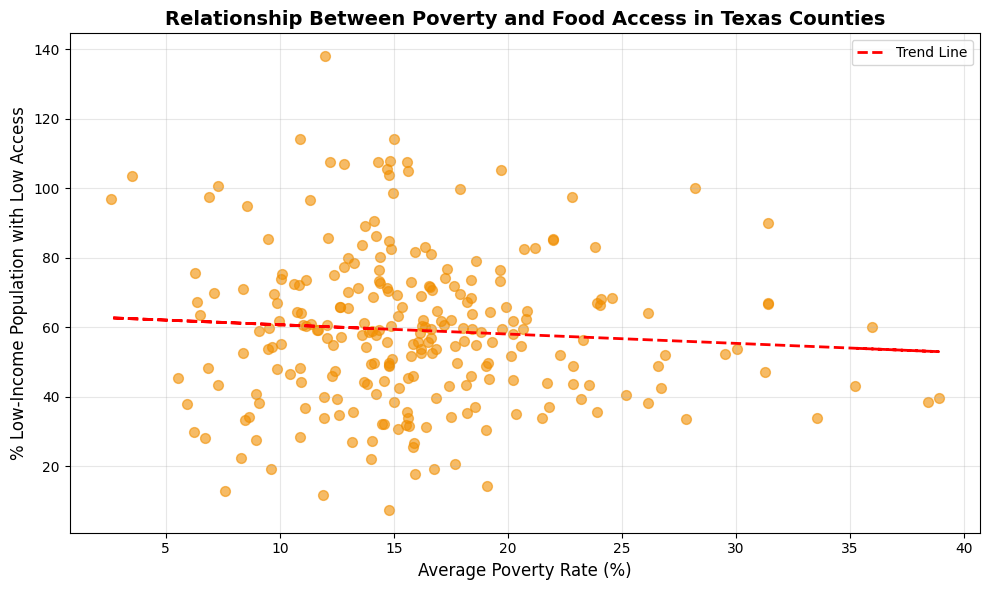


Correlation between Poverty Rate and Low-Income Low Access: -0.073
Number of counties analyzed: 253


In [73]:
# Load the dataset
texas_county = pd.read_csv('Texas_County_Merged.csv')

# Remove any rows with missing values in the variables of interest
analysis_data = texas_county.loc[texas_county['AvgPovertyRate'].notna() & 
                                  texas_county['Pct_LowIncome_LowAccess'].notna()].copy()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(analysis_data['AvgPovertyRate'], 
            analysis_data['Pct_LowIncome_LowAccess'], 
            alpha=0.6, 
            s=50, 
            color='#F18F01')

# Add trend line using numpy polyfit
z = np.polyfit(analysis_data['AvgPovertyRate'], analysis_data['Pct_LowIncome_LowAccess'], 1)
p = np.poly1d(z)
plt.plot(analysis_data['AvgPovertyRate'], 
         p(analysis_data['AvgPovertyRate']), 
         "r--", 
         linewidth=2, 
         label=f'Trend Line')

plt.xlabel('Average Poverty Rate (%)', fontsize=12)
plt.ylabel('% Low-Income Population with Low Access', fontsize=12)
plt.title('Relationship Between Poverty and Food Access in Texas Counties', 
          fontsize=14, 
          fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = analysis_data['AvgPovertyRate'].corr(analysis_data['Pct_LowIncome_LowAccess'])
print(f"\nCorrelation between Poverty Rate and Low-Income Low Access: {correlation:.3f}")
print(f"Number of counties analyzed: {len(analysis_data)}")

## Takeaways from these charts

1. **Weak negative correlation (-0.073)**: Contrary to intuitive expectations, there is virtually no linear relationship between poverty rates and low-income food access in Texas counties. The trend line is nearly flat with a slight downward slope.

2. **High variability across all poverty levels**: Counties with similar poverty rates show dramatically different food access outcomes. For example, counties with ~15% poverty rates range from 20% to 110% low-income low access.

3. **Clustering around 50-70% food access**: Most counties fall in the 40-80% range for low-income food access regardless of poverty rate, suggesting other factors (geography, infrastructure, transportation) may be more influential than poverty alone.

4. **Outliers at low poverty**: Several counties with poverty rates below 15% still have 90-140% low-income low access, indicating that even relatively affluent counties can face significant food access challenges.

5. **No floor or ceiling effect**: Counties exist across the full spectrum of both variables, with no obvious threshold where food access dramatically improves or worsens.

# Step 9 : Challenge and How We Approached

Working through this three dataset food accessibility project presented a steady stream of challenges, from initial data exploration through the final merge operations. Though the individual steps weren't conceptually revolutionary, the cumulative effect of working with three large, messy datasets taught us that data wrangling is fundamentally about systematic problem-solving.

Our first major challenge hit us during the initial data loading step. The USDA Food Access Research Atlas arrived with over 72,000 rows and 147 columns. We couldn't immediately tell which columns mattered for us Texas-focused data wrangling, and the huge volume made it tempting to just grab everything and figure it out later. Instead, We forced to slow down and examine the data dictionary, identifying which accessibility metrics actually aligned with my research questions about food deserts and low-income populations. This disciplined subsetting approach—reducing from 147 columns down to just 10-15 core variables—became a pattern I repeated with the County Demographics (43 columns) and Food Nutrition (38 columns) datasets. By the end, I had achieved an 86.8% dimension reduction across all three datasets, transforming 228 total columns into just 30 variables.

Once we had manageable subsets, we encountered our next obstacle, which is inconsistent missing value representations. The County Demographics dataset used -1 as a missing value placeholder, the USDA Atlas mixed genuine zeros with missing data markers, and the Food Nutrition dataset contained standard NaN values. We couldn't simply apply one universal cleaning rule. Instead, we developed dataset-specific filtering out -1 values from demographics, carefully distinguishing between "no low-access population" (legitimate zero) versus "data not collected" (missing) in the food access data, and handling NaN values in the nutrition dataset. This taught us that missing data isn't a single problem with a single solution; it requires understanding what missingness means in each specific context.

The census tract-to-county mapping challenge emerged during our merge planning phase. The Food Access Atlas operates at the census tract level, while County Demographics works with county-level aggregates. We initially worried about losing by aggregating tracts up to counties, but we realized this was actually necessary for our wrangling scope. The real challenge became ensuring we didn't accidentally duplicate data during the aggregation process or lose tracts that didn't cleanly map to our Texas county subset. We solved this by filtering for Texas first at the tract level, then carefully aggregating using sum functions for population counts and mean functions for rate-based metrics, always verifying our row counts before and after each transformation step.

Perhaps our most frustrating challenge involved inconsistent naming conventions across datasets. County names appeared with and without "County" suffixes, state representations alternated between full names and abbreviations, and the Food Nutrition dataset contained food name variations that seemed designed to confound any analysis. Early on, we attempted to handle these variations through complex pattern matching during data import, building what essentially became a mental dictionary of name pairs. The breakthrough came when we realized we needed to standardize these values explicitly through dedicated transformation steps rather than trying to match variations during merges. For counties, I stripped suffixes and converted to title case. For states, I created a consistent Texas filter that could handle both "TX" and "Texas" representations.

Our final major challenge involved determining the correct merge sequence and types. With three datasets coming from completely different sources, we had to map out which variables could serve as keys. We settled on a two-track approach: merging Food Access and County Demographics on county and state names (many-to-one, since multiple tracts map to each county), while keeping Food Nutrition as a standalone dataset that could later be linked through categorical analysis rather than direct merges. The trickiest part was ensuring we used inner joins to maintain only Texas-specific records while not accidentally dropping valid data due to name mismatches we hadn't yet caught.

Looking back, we are particularly proud of an aspect of this project. 

* Our reduction strategy not only made the datasets manageable but actually improved their wrangling clarity. Rather than keeping every possible variable "just in case," we made deliberate choices about which metrics truly addressed my research questions, resulting in three clean, focused datasets that tell a coherent story about Texas food accessibility. 

Throughout this project, we learned that data wrangling excellence isn't about techniques or elegant one-liners. It's about systematic thinking, attention to detail, and the patience to verify each transformation step before moving forward. The encoding inconsistencies and subtle aggregation errors really taught me that success in data wrangling comes from developing a suspicious, verification-oriented mindset where you trust nothing until you've explicitly confirmed it works as intended.

# Step 10 : Description of tool learning